In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display


In [22]:
# Loading and Preparing Data
df = pd.read_csv('IMDB_Dataset.csv')
display(df.head())

df['sentiment'] = df['sentiment'].map({'negative': 0, 'positive': 1})

# Separating features and labels
X = df['review']
y = df['sentiment']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [23]:
# Splitting the data into training and testing sets
X = df['review']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using TF-IDF Vectorizer with reduced feature size (max 10,000 features)
vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [9]:
# Training SVM using SGDClassifier
svm_model = SGDClassifier(loss='hinge', random_state=42)
svm_model.fit(X_train_vec, y_train)

# Making predictions
y_pred_svm = svm_model.predict(X_test_vec)

# Evaluating the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SGD SVM Accuracy: ", accuracy_svm * 100)


SGD SVM Accuracy:  89.12


In [10]:
# Training the Random Forest model using parallel processing
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_vec, y_train)

# Making predictions
y_pred_rf = rf_model.predict(X_test_vec)

# Evaluating the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy: ", accuracy_rf * 100)


Random Forest Accuracy:  85.38


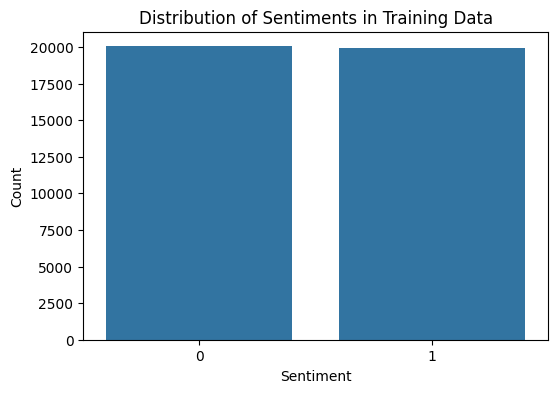

In [11]:
# Bar Plot for Sentiment Distribution in Training Data
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train)
plt.title('Distribution of Sentiments in Training Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


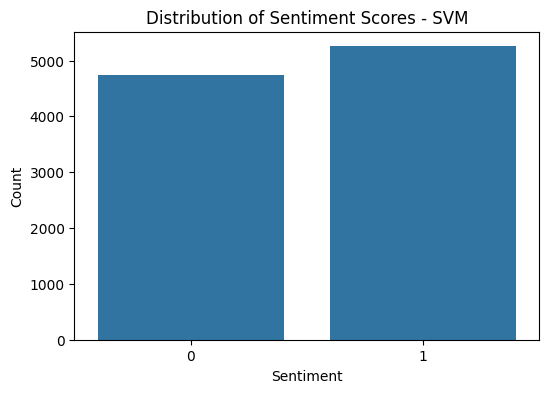

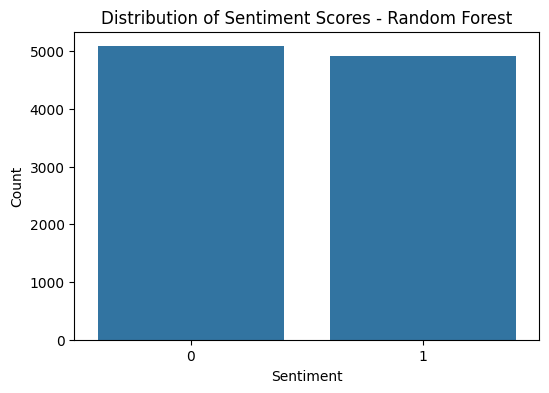

In [12]:
# Distribution of Sentiment Scores (Model Predictions vs Actual)
plt.figure(figsize=(6, 4))

# SVM Predictions Distribution
sns.countplot(x=y_pred_svm)
plt.title('Distribution of Sentiment Scores - SVM')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Random Forest Predictions Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y_pred_rf)
plt.title('Distribution of Sentiment Scores - Random Forest')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


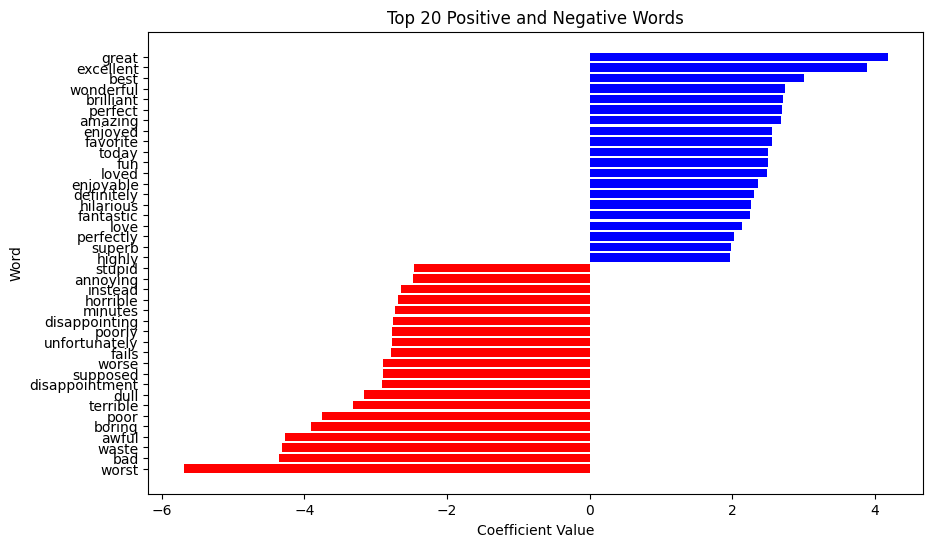

In [19]:
import numpy as np

def plot_top_n_words(model, vectorizer, N=20):
    # Get the feature names from the TF-IDF vectorizer
    feature_names = vectorizer.get_feature_names_out()
    
    # Get the coefficients of the model (for linear classifiers like SVM or Logistic Regression)
    if hasattr(model, 'coef_'):
        coefs = model.coef_[0]
    else:
        raise ValueError("Model does not have 'coef_' attribute. Ensure you're using a linear classifier.")
    
    # Sort the coefficients to get top N positive and negative contributing words
    top_positive_coefficients = np.argsort(coefs)[-N:]
    top_negative_coefficients = np.argsort(coefs)[:N]
    
    # Combine both sets of coefficients for visualization
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    
    # Get the words corresponding to the top coefficients
    top_words = feature_names[top_coefficients]
    
    # Get the corresponding coefficient values
    top_coefs = coefs[top_coefficients]
    
    # Set up a plot
    plt.figure(figsize=(10, 6))
    colors = ['red' if c < 0 else 'blue' for c in top_coefs]
    plt.barh(np.arange(2 * N), top_coefs, color=colors)
    plt.yticks(np.arange(2 * N), top_words)
    plt.title(f'Top {N} Positive and Negative Words')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Word')
    plt.show()

plot_top_n_words(svm_model, vectorizer, N=20)


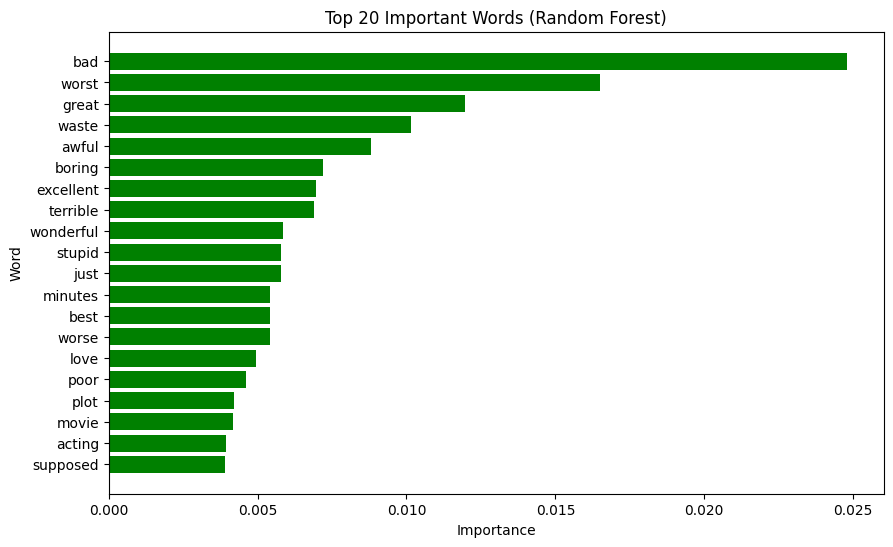

In [20]:
def plot_top_n_words_rf(model, vectorizer, N=20):
    # Get the feature names from the TF-IDF vectorizer
    feature_names = vectorizer.get_feature_names_out()
    
    # Get feature importances from the Random Forest model
    importances = model.feature_importances_
    
    # Sort the feature importances to get top N important words
    top_features = np.argsort(importances)[-N:]
    
    # Get the words corresponding to the top feature importances
    top_words = feature_names[top_features]
    
    # Get the corresponding importance values
    top_importance_values = importances[top_features]
    
    # Set up a plot
    plt.figure(figsize=(10, 6))
    plt.barh(np.arange(N), top_importance_values, color='green')
    plt.yticks(np.arange(N), top_words)
    plt.title(f'Top {N} Important Words (Random Forest)')
    plt.xlabel('Importance')
    plt.ylabel('Word')
    plt.show()

# Visualize top N words for Random Forest model
plot_top_n_words_rf(rf_model, vectorizer, N=20)
